In [8]:
import rasterio
from rasterio.plot import show, show_hist
from rasterio.mask import mask
from shapely.geometry import box
import geopandas as gpd
from fiona.crs import from_epsg
from pycrs import parse
import glob
import os
from crawlers.csv_reader import csv_crawler

In [19]:
lst = glob.glob("/home/chiko/Storage/Projects/Raster_Image_Calculator/Images/Request.2/Start_date/**/*.tiff", recursive=True) 
lst.sort()
len(lst)
for img in lst:
    os.chdir(img)

/home/chiko/Storage/Projects/Raster_Image_Calculator/Images/Request.2/Start_date/LC08_L1TP_143044_20190218_20190222_01_T1/LC08_L1TP_143044_20190218_20190222_01_T1_msavi_landsat.tiff
/home/chiko/Storage/Projects/Raster_Image_Calculator/Images/Request.2/Start_date/LC08_L1TP_143044_20190218_20190222_01_T1/LC08_L1TP_143044_20190218_20190222_01_T1_ndmi_landsat.tiff
/home/chiko/Storage/Projects/Raster_Image_Calculator/Images/Request.2/Start_date/LC08_L1TP_143044_20190218_20190222_01_T1/LC08_L1TP_143044_20190218_20190222_01_T1_ndvi_landsat.tiff
/home/chiko/Storage/Projects/Raster_Image_Calculator/Images/Request.2/Start_date/LC08_L1TP_143044_20190218_20190222_01_T1/LC08_L1TP_143044_20190218_20190222_01_T1_ndwi_landsat.tiff
/home/chiko/Storage/Projects/Raster_Image_Calculator/Images/Request.2/Start_date/LC08_L1TP_143044_20190218_20190222_01_T1/LC08_L1TP_143044_20190218_20190222_01_T1_savi_landsat.tiff
/home/chiko/Storage/Projects/Raster_Image_Calculator/Images/Request.2/Start_date/LC08_L1TP_143

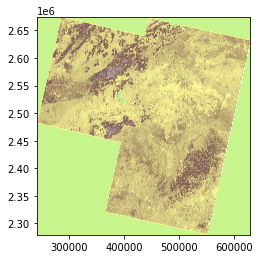

80.18962105369998 22.462053387 80.5198659055 22.821660207


/home/chiko/miniconda3/envs/geo/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [13]:
fp = "/home/chiko/Storage/Projects/Raster_Image_Calculator/Images/Request.2/Start_date/mosaics/Start_date_mosaic_msavi.tiff"
out_tif = "/home/chiko/Storage/Projects/Raster_Image_Calculator/Images/Request.2/Start_date/mosaics/start_clipped_msavi.tiff"

data = rasterio.open(fp)

show(data, cmap="terrain")

[minx, miny, maxx, maxy] = csv_crawler(test=True, clipper=True)
print(minx, miny, maxx, maxy)

bbox = box(minx, miny, maxx, maxy)

geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=from_epsg(4326))

geo = geo.to_crs(crs=data.crs.data)


In [ ]:

def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

In [ ]:
coords = getFeatures(geo)

print(coords)

out_img, out_transform = mask(data, shapes=coords, crop=True)

out_meta = data.meta.copy()
print(out_meta)

epsg_code = int(data.crs.data['init'][5:])
print(epsg_code)


In [ ]:
out_meta.update({"driver": "GTiff",
                 "height": out_img.shape[1],
                 "width": out_img.shape[2],
                 "transform": out_transform,
                 "crs": parse.from_epsg_code(epsg_code).to_proj4()})


In [ ]:
with rasterio.open(out_tif, "w", **out_meta) as destination:
    destination.write(out_img)

clipped = rasterio.open(out_tif)
show(clipped, cmap="terrain")